# 의사결정 트리 개요
- 일련의 분류 규칙을 통해 데이터를 분류, 회귀하는 지도 학습 모델 중 하나
- 특정 기준(질문)에 따라 데이터를 구분하는 모델
- 한번의 분기 때마다 변수 영역을 두개로 구분
- 결정 트리에서 질문이나 정답은 노드 (Node)라고 불림
    - 맨 처음 분류 기준을 Root Node
    - 중간 분류 기준을 Intermediate Node
- 맨 마지막 노드를 Terminal Node 혹은 Leaf Node라고 함


> 결정트리의 기본 아이디어는, Leaf Node가 가장 섞이지 않는 상태로 완전히 분류되는 것, 즉 복잡성(entropy)이 낮도록 만드는 것

# 불순도(Impurity)
- 결정트리에서 분기기준을 선택하기 위해서는 불순도(impurity)라는 개념을 사용함
    - 복잡성을 의미하며, 해당 범주안에서 서로 다른 데이터가 얼마나 섞여 있는지를 뜻함
    - 다양한 개체들이 섞여 있을수록 불순도가 높아짐
- 분기기준 설정 시 현재 노드의 불순도에 비해 자식 노드의 불순도가 감소되도록 설정해야 하며
- 현재 노드의 불순도와 자식노드의 불순도의 차이를 Information Gain(정보 획득)이라고 함

# 불순도 함수( Gini, Entropy)
- 불순도를 수치적으로 나타낼 수 있는 대표적인 불순도 함수는 지니와 엔트로피 지수가 있다.
- 지니 지수(Gini)
    - 공식
    $$I(A)=1-\sum^{m}_{k=1}{p_k}^2$$
    - 지니 지수의 최대값은 0.5
    - 주머니 안에 빨간색 공 10개, 파란색 공 6개가 있을 때의 계산
    $$1-\left(\frac{6}{16}\right)^2-\left(\frac{10}{16}\right)^2=0.47$$
- 엔트로피(Entropy)
    - 공식
    $$E = -\sum^{k}_{i=1}p_i\log_2{\left(p_i\right)}$$
    - 주머니 안에 빨간색 공 10개, 파란색 공 6개가 있을 때의 계산
    $$ - \left\{ \frac{6}{16} \log_2\left(\frac{6}{16}\right) + \frac{10}{16} \log_2\left(\frac{10}{16}\right) \right\} = 0.95$$

> 분기를 하였을 때 이러한 불순도 함수의 값(지니 지수 또는 엔트로피 지수)이 줄어드는 방향으로 트리를 형성해야 함

# 정보획득(Information gain)
- 분기 이전의 불순도와 분기 이후의 불순도의 차이를 정보 획득이라고 함
- 불순도가 1인 상태에서 0.7인 상태로 바뀌었다면 정보 획득(information gain)은 0.3
- 결정트리 구성 단계
    1. Root 노드의 불순도 계산
    2. 나머지 속성에 대해 분할 후 자식 노드의 불순도 계산
    3. 각 속성에 대한 Information Gain 계산 후 Information gain(Root 노드와 자식 노드의 불순도 차이)이 최대가 되는 분기 조건을 찾아 분기
    4. 모든 leaf 노드의 불순도가 0이 될 때까지 2, 3을 반복 수행

예제) 테니스 경기 참가 여부
![image](https://user-images.githubusercontent.com/70187490/130411360-5e259687-2ed3-4159-aeb0-52a744e3ef64.png)
- Approach 1) Root 노드의 불순도 계산
![image](https://user-images.githubusercontent.com/70187490/130411532-0b0f3836-c7b9-4df3-9249-5def551e5dd7.png)
- Approach 2) 나머지 속성에 대해 분할 후 자식노드의 불순도 계산
    - 2-1) 날씨
    ![image](https://user-images.githubusercontent.com/70187490/130411733-5fba4a1c-fb82-40d8-b6b0-f3946d76c6be.png)
    - 2-2) 온도
    ![image](https://user-images.githubusercontent.com/70187490/130411890-7dcfc53e-6008-4d7a-8318-b6a26ffd00da.png)
    - 2-3) 습도
    ![image](https://user-images.githubusercontent.com/70187490/130411951-ce72bfa4-76d7-4926-bdfa-97d22c220349.png)
    - 2-4) 바람
    ![image](https://user-images.githubusercontent.com/70187490/130411996-6b485ec3-0421-41c3-908b-86cdb09a5841.png)
- Approach 3) 각 속성에 대한 Information Gain 계산후 Information Gain(Root 노드와 자식 노드의 불순도 차이)이 최대가 되는 분기조건을 찾아 분기
![image](https://user-images.githubusercontent.com/70187490/130412252-f3d5811b-5f2f-4d4a-85b1-ff783222c4dd.png)
- Approach 4) 모든 leaf 노드의 불순도가 0이 될때까지 2, 3을 반복한다.
    * 예를 들어 "맑음"으로 분류된 노드는  "날씨=맑음"인 데이터만 가지고 와서 다시 분할 전 엔트로피를 계산한다.
    ![image](https://user-images.githubusercontent.com/70187490/130412428-c3715419-03f9-4cc7-a7b7-026a827d1834.png)
    ![image](https://user-images.githubusercontent.com/70187490/130412489-4816afd8-3ca0-4250-9652-f23484191abf.png)
    ![image](https://user-images.githubusercontent.com/70187490/130412535-bf9bbb37-0b49-4110-8943-67723652523c.png)

# 일반화
- 위 구성방법을 사용하여 트리를 형성하게 되면, leaf 노드가 순도 100%의 한가지 범주만을 가지게 되는 Full tree(최대 트리)를 형성하게 된다.
- 하지만 이러한 최대 트리는 새로운 데이터에 적용할 때 과적합 문제(Overfitting)가 발생하여 일반화 성능을 떨어지게 된다.
- 따라서 형성된 결정트리에 대해 가지치기(Prunning)를 수행하여 일반화 성능을 높힌다.

# 가지치기(Pruning)

- 가지치기란 최대트리로 형성된 결정트리의 특정 노드 밑의 하부 트리를 제거하여 일반화 성능을 높이는 것을 의미한다.(오버피팅을 막기위해)
- 더 많은 가지가 생기지 않도록 최대깊이, leaf 노드의 최대 개수, 한 노드가 분할하기 위한 최소 데이터 수 등의 제한이 가능하다.

# 가지치기의 비용함수
- 의사 결정나무는 이 비용함수를 최소로 하는 분기를 찾아내도록 학습 됨
- $CC(T) =Err(t) + \alpha \times L(T)$
    - $CC(T)$
        - 의사결정나무의 비용 복잡도
        - 오류가 적으면서 terminal node 수가 적은 단순한 모델일수록 작은 값
    - $Err(T)$
        - 검증 데이터에 대한 오분류율
    - $L(T)$
        - teminal node의 수
        - 구조의 복잡도
    - $\alpha$
        - $Err(T)$와 $L(T)$를 결합하는 가중치
        - 사용자에 의해 부여됨, 보통 0.01 ~ 0.1의 값을 씀

# 장점과 한계
- 장점:
    - 데이터 전처리( 정규화, 결측치, 이상치 등)을 하지 않아도 된다,
    - 수치형과 범주형 변수를 한꺼번에 다룰 수 있다.
- 한계:
    - 만약 샘플 사이즈가 크면 효율성 및 가독성이 떨어진다.
    - 과적합으로 알고리즘 성능이 떨어질 수 있다.
        - 이를 극복하기 위해서 트리의 크기를 사전에 제한하는 튜닝이 필요하다.
    - 한번에 하나의 변수만을 고려하므로 변수 간 상호작용을 파악하기 어렵다.
    - 결정트리는 Hill Climbing 방식 및 Greedy 방식을 사용하고 있다.
        - 일반적인 Greedy 방식의 알고리즘이 그렇듯이 이 방식은 최적의 해를 보장하지는 못한다.
    - 약간의 차이에 따라 (레코드의 개수의 약간의 차이) 트리의 모양이 많이 달라질 수 있다.
        - 두 변수가 비슷한 수준의 정보력을 갖는다고 했을 때, 약간의 차이에 의해 다른 변수가 선택되면 이 후의 트리구성이 크게 달라질 수 있다.
    - 이 같은 문제를 극복하기 위해 등장한 모델이 바로 랜덤포르세트
        - 같은 데이터에 대해 의사결정나무를 여러 개 만들어 그 결과를 종합해 예측 성능을 높이는 기법

In [1]:
import pandas as pd

tennis = pd.DataFrame({'Date':[ 'D'+ str(i) for i in range(1, 15) ],
                       'Weather':['Sunny', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 
                                  'Rainy', 'Cloudy','Sunny', 'Sunny', 'Rainy',
                                  'Sunny', 'Cloudy','Cloudy','Rainy'],
                       'Temperture':['Hot', 'Hot', 'Hot', 'Mild',
                                     'Cool', 'Cool', 'Cool','Mild',
                                     'Cool', 'Mild','Mild','Mild',
                                     'Hot','Mild'],
                       'Humid':['High','High','High','High',
                                'Normal','Normal','Normal','High',
                                'Normal','Normal','Normal','High',
                                'Normal','High'],
                       'Wind':['Weak','Strong','Weak','Weak','Weak',
                               'Strong','Strong','Weak','Weak','Weak',
                               'Strong','Strong', 'Weak','Strong'],
                       'Play':['No','No','Yes','Yes','Yes',
                               'No','Yes','No','Yes','Yes',
                               'Yes','Yes','Yes', 'No']})
tennis

,Date,Weather,Temperture,Humid,Wind,Play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Cloudy,Hot,High,Weak,Yes
3,D4,Rainy,Mild,High,Weak,Yes
4,D5,Rainy,Cool,Normal,Weak,Yes
5,D6,Rainy,Cool,Normal,Strong,No
6,D7,Cloudy,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rainy,Mild,Normal,Weak,Yes


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

feature_df = pd.get_dummies(tennis.iloc[:,:-1])
target_df = pd.get_dummies(tennis.iloc[:,-1])

dt = DecisionTreeClassifier(criterion='entropy')
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, test_size=0.1)

dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

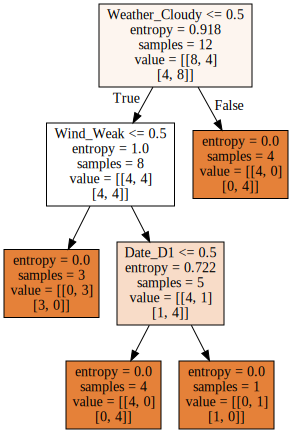

In [3]:
from sklearn.tree import export_graphviz
import graphviz

tree_vi=export_graphviz(dt, class_names=target_df.columns, 
                        feature_names = feature_df.columns,
                        filled=True, impurity=True)
graphviz.Source(tree_vi)

# 결정트리 하이퍼파라미터
![image](https://user-images.githubusercontent.com/70187490/128495313-e3a9e5a8-1dca-4522-b41b-92873cac9ae3.png)

ValueError: 'c' argument has 24 elements, which is inconsistent with 'x' and 'y' with size 12.

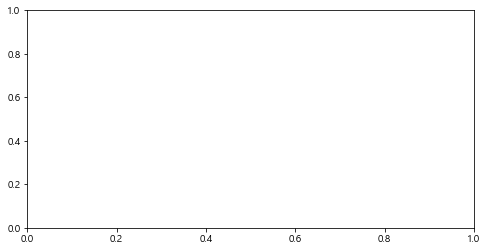

In [38]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()

dt_clf = DecisionTreeClassifier(random_state=156)

def visualize_boundary(estimator, X, y, columns, title=None):

    X=X.to_numpy()
    y=y.to_numpy()
    estimator.fit(X, y)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolor='k', s=20, zorder=3);
    ax.axis('tight')
    
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()        
    
    xx, yy = np.meshgrid( np.arange(xlim_start, xlim_end, 0.02),
                          np.arange(ylim_start, ylim_end, 0.02))

    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.5,
                           levels=np.arange(len(np.unique(y)) + 1) - 0.5,
                           cmap='rainbow');
    
    plt.xlabel(iris.feature_names[columns[0]], fontsize=16)
    plt.ylabel(iris.feature_names[columns[1]], fontsize=16)
    
    if title == None:
        pass
    else:
        plt.title(str(title), fontsize=16)
        
for i in [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]:
    visualize_boundary(dt_clf, X_train.iloc[:,i[0]:i[1]+1], y_train, i)

In [30]:
X_train.iloc[:,1:3]

,Date_D10,Date_D11
5,0,0
0,0,0
1,0,0
9,1,0
11,0,0
8,0,0
6,0,0
13,0,0
2,0,0
4,0,0


In [ ]:
def graphviz(model, dataset):
    X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target,
                                                        test_size=0.2, random_state=11)
    model.fit(X_train, y_train)
    dt = export_graphviz(model, class_names = dataset.target_names, 
                                feature_names = dataset.feature_names,
                                filled=True, impurity=True)
    graphviz.Source(dt)

In [ ]:
i =[0,1]
dt_clf = DecisionTreeClassifier(random_state=156)
visualize_boundary(dt_clf, X_train[:,i], y_train, i, title='None')
graphviz(dt_clf, iris)
# 트리의 최대 깊이를 규정
dt_clf = DecisionTreeClassifier(max_depth=3,random_state=156)
visualize_boundary(dt_clf, X_train[:,i], y_train, i, title='max_depth=3')

# 노드를 분할하기 위한 최소한의 샘플 데이터 수
dt_clf = DecisionTreeClassifier(min_samples_split=40,random_state=156)
visualize_boundary(dt_clf, X_train[:,i], y_train, i, title='min_samples_split=40')

# 말단 노드가 되기 위한 최소한의 샘플 데이터 수
dt_clf = DecisionTreeClassifier(min_samples_leaf=4,random_state=156)
visualize_boundary(dt_clf, X_train[:,i], y_train, i, title='min_samples_leaf=4')

# 말단 노드의 최대 개수
dt_clf = DecisionTreeClassifier(max_leaf_nodes=2,random_state=156)
visualize_boundary(dt_clf, X_train[:,i], y_train, i, title='max_leaf_nodes=2')

# 최적의 분할을 위해 고려할 최대 피처 개수.
dt_clf = DecisionTreeClassifier(max_features='auto',random_state=156)
visualize_boundary(dt_clf, X_train[:,i], y_train, i, title="max_features='auto'")

In [ ]:
dataset=iris
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target,
                                                    test_size=0.2, random_state=11)
DecisionTreeClassifier.fit(X_train, y_train)
dt = export_graphviz(model, class_names = dataset.target_names, 
                            feature_names = dataset.feature_names,
                            filled=True, impurity=True)
graphviz.Source(dt)